In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/bobo/data_analysis/project4/healthcare.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,Bobby Jackson,19,Female,AB+,Infections,2024-01-31,Matthew Smith,Northwestern Memorial Hospital,Blue Cross,2212.273,328,Emergency,2024-02-07,Azithromycin,Normal,7
1,Leslie Terry,15,Female,B-,Flu,2019-08-20,Samantha Davies,UI Health (University of Illinois Hospital),UnitedHealthcare,3185.161,265,Emergency,2019-08-22,Tamiflu,Abnormal,2
2,Danny Smith,50,Female,A+,Cancer,2022-09-22,Tiffany Mitchell,UI Health (University of Illinois Hospital),Blue Cross,72055.214,205,Elective,2022-10-30,Cisplatin,Inconclusive,38
3,Andrew Watts,24,Female,O+,Asthma,2020-11-18,Kevin Wells,UI Health (University of Illinois Hospital),Aetna,4092.601,450,Elective,2020-11-19,Prednisone,Normal,1
4,Adrienne Bell,80,Female,A+,Heart Disease,2022-09-19,Kathleen Hanna,Northwestern Memorial Hospital,Cigna,47985.660,458,Routine,2022-10-27,Beta-blockers,Inconclusive,38


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
 15  Length of Stay      55500 non-null  int64  
dtypes: f

In [3]:
print('number of duplicated rows is {}'.format(df.duplicated().sum()))
print('number of empty cells in each row is : \n{}'.format(df.isnull().sum()))

number of duplicated rows is 0
number of empty cells in each row is : 
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Length of Stay        0
dtype: int64


In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns
for col in categorical_columns:
    df[col] = df[col].astype('string').str.strip().str.title()

In [6]:
for col in categorical_columns:
    unique_count = df[col].nunique()
    most_common = df[col].mode()[0]
    print(f"   • {col}: {unique_count} unique values (Most common: {most_common})")
    print('')

   • Name: 40235 unique values (Most common: Michael Williams)

   • Gender: 2 unique values (Most common: Female)

   • Blood Type: 8 unique values (Most common: O+)

   • Medical Condition: 8 unique values (Most common: Flu)

   • Date of Admission: 1827 unique values (Most common: 2024-03-16)

   • Doctor: 40341 unique values (Most common: Michael Smith)

   • Hospital: 4 unique values (Most common: Northwestern Memorial Hospital)

   • Insurance Provider: 5 unique values (Most common: Cigna)

   • Admission Type: 4 unique values (Most common: Emergency)

   • Discharge Date: 1901 unique values (Most common: 2022-02-04)

   • Medication: 23 unique values (Most common: Metformin)

   • Test Results: 3 unique values (Most common: Abnormal)



In [ ]:
df['age category'] = pd.cut(df['Age'], bins=[0,13,19,39,59,float('inf')], labels=['child','teen','young adult','adult','senior'])

In [7]:
# outliers detection 
import scipy 

z_score = np.abs(scipy.stats.zscore(df[numerical_columns]))
z_outliers = (z_score > 3).any(axis=1)

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
IQR_outliers =  ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

all_otliers = z_outliers | IQR_outliers

C:\Users\ibrah\AppData\Local\Temp\ipykernel_13036\231617941.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Billing Amount', ax=ax[0, 1], palette='pastel')
C:\Users\ibrah\AppData\Local\Temp\ipykernel_13036\231617941.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cat_avg = df.groupby('age category')['Length of Stay'].mean().sort_values()


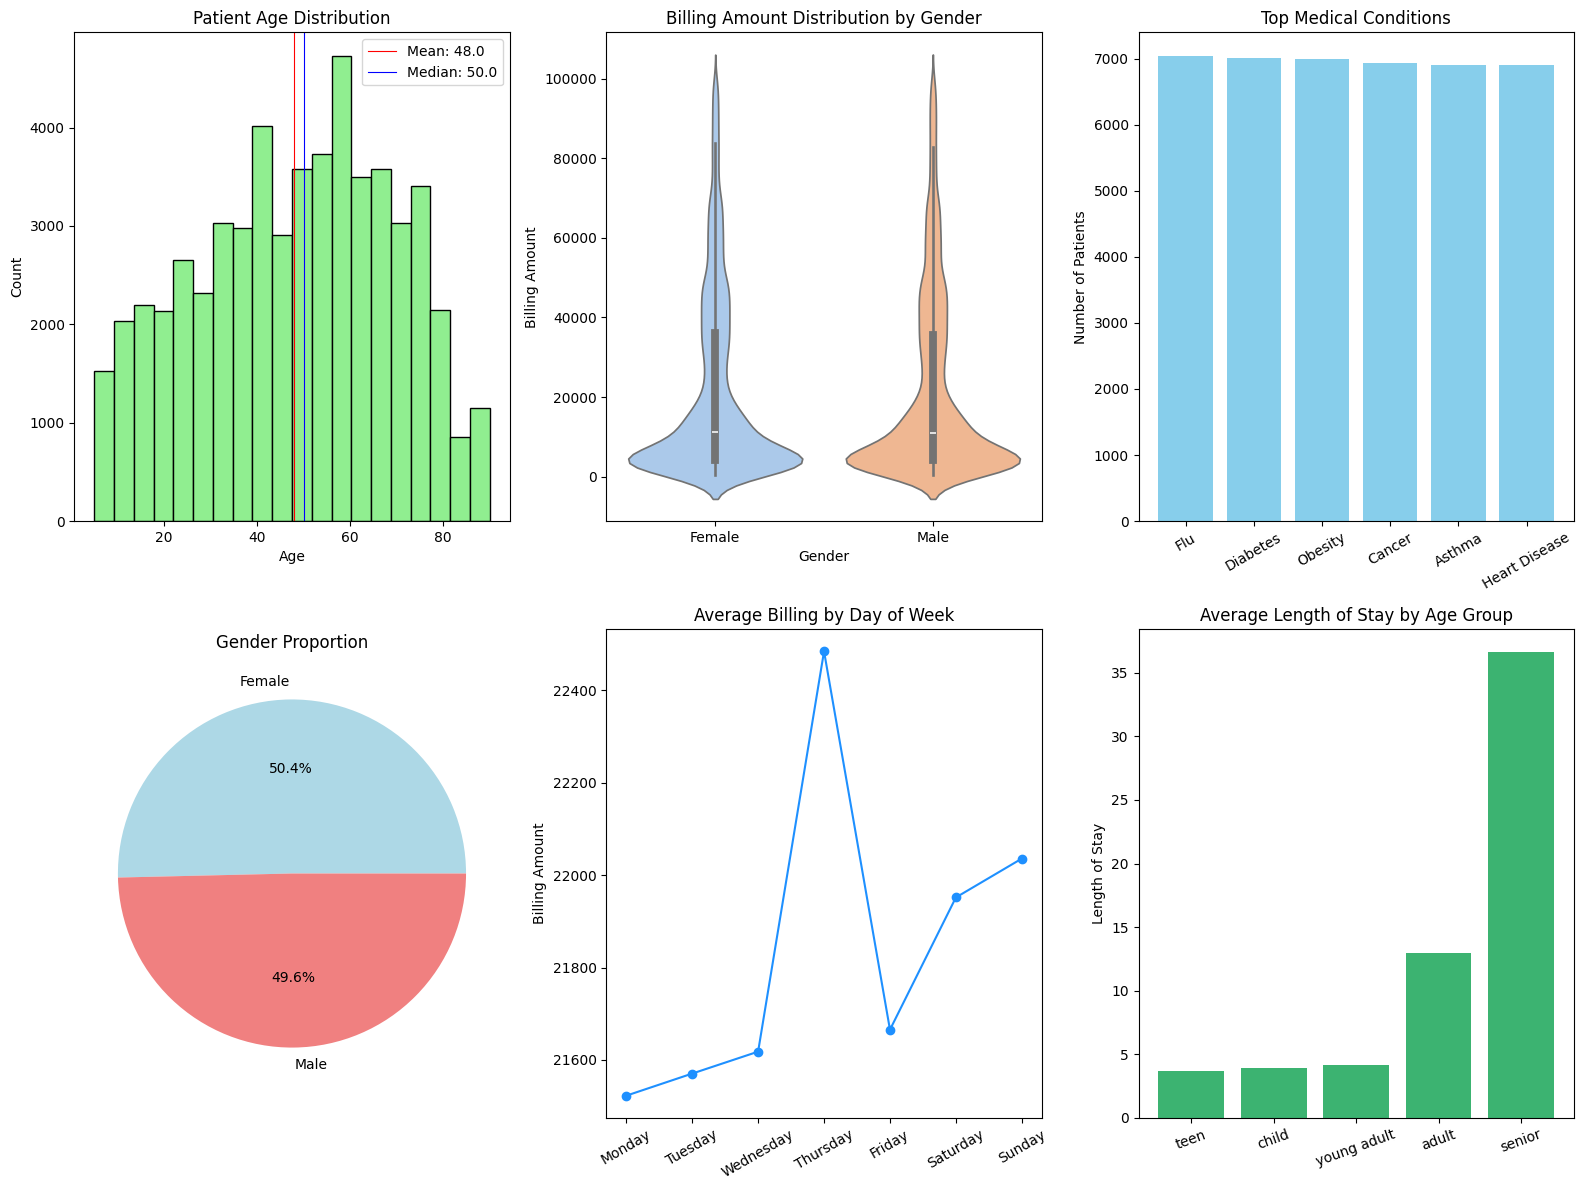

In [15]:
import seaborn as sns
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 12))

# 1. Age distribution histogram
ax[0, 0].hist(df['Age'], bins=20, color='lightgreen', edgecolor='black')
ax[0, 0].axvline(df['Age'].mean(), color='red', label=f"Mean: {df['Age'].mean():.1f}", lw=0.8)
ax[0, 0].axvline(df['Age'].median(), color='blue', label=f"Median: {df['Age'].median():.1f}", lw=0.8)
ax[0, 0].set_title('Patient Age Distribution')
ax[0, 0].set_xlabel('Age')
ax[0, 0].set_ylabel('Count')
ax[0, 0].legend()

# 2. Billing amount by gender (violin)
sns.violinplot(data=df, x='Gender', y='Billing Amount', ax=ax[0, 1], palette='pastel')
ax[0, 1].set_title('Billing Amount Distribution by Gender')
ax[0, 1].set_xlabel('Gender')
ax[0, 1].set_ylabel('Billing Amount')

# 3. Count of patients by medical condition
top_conditions = df['Medical Condition'].value_counts().head(6)
ax[0, 2].bar(top_conditions.index, top_conditions.values, color='skyblue')
ax[0, 2].set_title('Top Medical Conditions')
ax[0, 2].set_ylabel('Number of Patients')
ax[0, 2].tick_params(axis='x', rotation=30)

# 4. Gender proportion pie chart
gender_counts = df['Gender'].value_counts()
ax[1, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
ax[1, 0].set_title('Gender Proportion')

# 5. Average billing amount by day of discharge
df['Discharge Day'] = pd.to_datetime(df['Discharge Date']).dt.day_name()
day_avg = df.groupby('Discharge Day')['Billing Amount'].mean()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_avg = day_avg.reindex(ordered_days)
ax[1, 1].plot(day_avg.index, day_avg.values, marker='o', color='dodgerblue')
ax[1, 1].set_title('Average Billing by Day of Week')
ax[1, 1].set_ylabel('Billing Amount')
ax[1, 1].tick_params(axis='x', rotation=30)

# 6. Average Length of Stay by Age Category
age_cat_avg = df.groupby('age category')['Length of Stay'].mean().sort_values()
ax[1, 2].bar(age_cat_avg.index, age_cat_avg.values, color='mediumseagreen')
ax[1, 2].set_title('Average Length of Stay by Age Group')
ax[1, 2].set_ylabel('Length of Stay')
ax[1, 2].tick_params(axis='x', rotation=20)

plt.tight_layout()

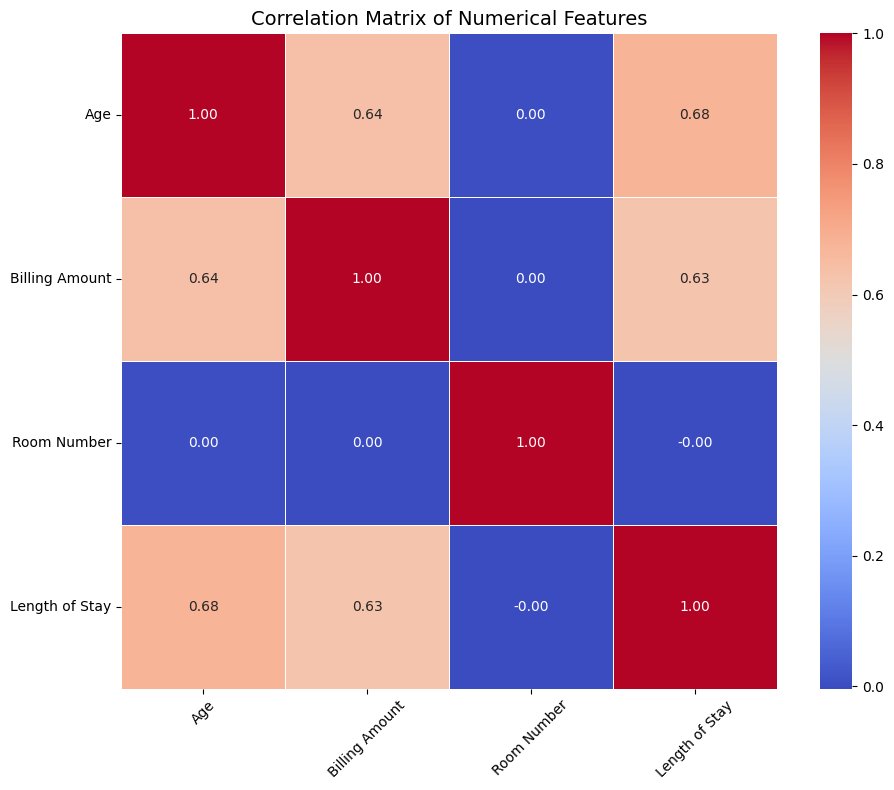

In [ ]:
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

In [ ]:
male_bills = df[df['Gender'] == 'Male']['Billing Amount'].dropna()
female_bills = df[df['Gender'] == 'Female']['Billing Amount'].dropna()
t_stat, p_value = scipy.stats.ttest_ind(male_bills, female_bills, equal_var=False)  # Welch’s t-test
print(f'T-statistic: {t_stat:.3f}')
print(f'P-value: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in billing amounts')
else:
    print('Fail to reject the null: No significant difference in billing amounts')

T-statistic: -0.786
P-value: 0.4319
Fail to reject the null: No significant difference in billing amounts.


In [21]:
# contingency table
contingency = pd.crosstab(df['Blood Type'], df['Medical Condition'])
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency)
#results
print('Chi-square Statistic:', round(chi2, 3))
print('Degrees of Freedom:', dof)
print('P-value:', round(p, 4))
alpha = 0.05
if p < alpha:
    print('Reject the null hypothesis: There IS a relationship between blood type and medical condition')
else:
    print('Fail to reject the null: No significant relationship between blood type and medical condition')

Chi-square Statistic: 55.336
Degrees of Freedom: 49
P-value: 0.2479
Fail to reject the null: No significant relationship between blood type and medical condition
